In [36]:
import pandas as pd
import numpy as np

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

from sklearn.svm import SVC

from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline


In [11]:
df_train = pd.read_csv('liverpool-ion-switching/train.csv')

In [13]:
df_test = pd.read_csv('liverpool-ion-switching/test.csv')

## Exploring the Data

In [30]:
df_train.head(20)
df_train.shape

(5000000, 4)

In [7]:
df.tail(10)

,time,signal,open_channels
4999990,499.9991,4.5083,8
4999991,499.9992,3.3877,7
4999992,499.9993,2.3484,7
4999993,499.9994,4.1915,8
4999994,499.9995,4.3713,8
4999995,499.9996,2.9194,7
4999996,499.9997,2.6980,7
4999997,499.9998,4.5164,8
4999998,499.9999,5.6397,9
4999999,500.0000,5.3792,9


In [14]:
df_test.head()

,time,signal
0,500.0001,-2.6498
1,500.0002,-2.8494
2,500.0003,-2.8600
3,500.0004,-2.4350
4,500.0005,-2.6155


In [17]:
df_samp = pd.read_csv('liverpool-ion-switching/sample_submission.csv')

In [19]:
df_samp.tail()

,time,open_channels
1999995,699.9996,0
1999996,699.9997,0
1999997,699.9998,0
1999998,699.9999,0
1999999,700.0000,0


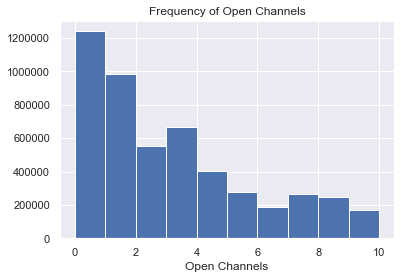

In [40]:
plt.hist(df_train['open_channels'])
plt.xlabel('Open Channels')
plt.title('Frequency of Open Channels')
plt.show()

In [26]:
df_train['batch'] = (df_train.index // 500_000) + 1

In [43]:
df_train = df_train.assign(outcome_open_channel=(df_train['open_channels']>0).astype(int))

In [44]:
df_train.tail()

,time,signal,open_channels,batch,outcome_open_channel
4999995,499.9996,2.9194,7,10,1
4999996,499.9997,2.6980,7,10,1
4999997,499.9998,4.5164,8,10,1
4999998,499.9999,5.6397,9,10,1
4999999,500.0000,5.3792,9,10,1


In [31]:
df_test.shape

(2000000, 2)

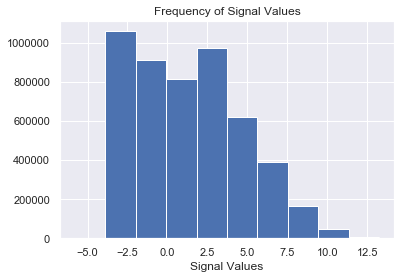

In [41]:
plt.hist(df_train['signal'])
plt.xlabel('Signal Values')
plt.title('Frequency of Signal Values')
plt.show()

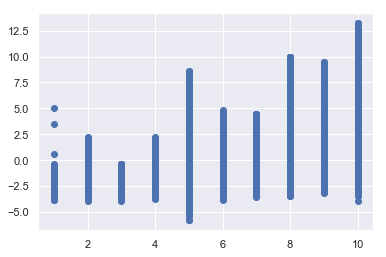

In [33]:
x = df_train['batch']
y = df_train['signal']
plt.scatter(x,y)
plt.show()

## Create Baseline

Using Gradient Boosted Trees model as baseline for this time series problem. Original baseline code was lost, been trying to duplicate it. First F1 score: 68%.

In [62]:
clf = GradientBoostingClassifier(n_estimators=2000,
                                 learning_rate=0.1, random_state=10, 
                                 subsample=0.9, max_depth=5, max_features=5,
                                 min_samples_leaf=2, min_samples_split=5,
                                 validation_fraction=0.20, # use 20% of the data as hold-out for early stopping
                                 n_iter_no_change=50, # allowed to go 50 iterations without improvement to hold-out score
                                 verbose=0)
used_cols = [c for c in df_train.columns.tolist() if c not in ['open_channels']]
X_train = df_train[used_cols]
y_train = df_train['open_channels']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=0.25, random_state=10)
#scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
#print(scores.mean(), "+/-", scores.std())
#f1 = f1_score(feature, y)
#f1
#clf.fit(X_train,y_train)